In [328]:
import pandas as pd
import numpy as np

#%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

directory_1='C:\\Users\\poll\\zzz_Data_science\\1_intro_TO_DS_karpov\\'

In [329]:
sns.set(rc={'figure.figsize':(12,6)})

# 1.110 ==========================================================
### Почему пользователи не заканчивают курс до конца и бросают курс


In [330]:
event_data=pd.read_csv(directory_1+'PD_pract\\event_data_train.csv')

'''
event_data=pd.read_csv(directory_1+'PD_pract\\event_data_train.zip',compression='zip')
'''

"\nevent_data=pd.read_csv(directory_1+'PD_pract\\event_data_train.zip',compression='zip')\n"

In [331]:
event_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [332]:
event_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [333]:
event_data.shape

(3480703, 4)

In [334]:
event_data['date']=pd.to_datetime(event_data['timestamp'],unit='s')

In [335]:
event_data.head(10)

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
5,32811,1434340895,passed,17632,2015-06-15 04:01:35
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19
9,32929,1434340944,passed,17632,2015-06-15 04:02:24


In [336]:
event_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [337]:
print(event_data.date.min())
print(event_data.date.max())
event_data.date.max()-event_data.date.min()

2015-06-15 04:00:48
2018-05-19 23:33:31


Timedelta('1069 days 19:32:43')

In [338]:
event_data['day']=event_data['date'].dt.date

In [339]:
event_data.head(10)

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01,2015-06-15
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01,2015-06-15
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15


<AxesSubplot:xlabel='day'>

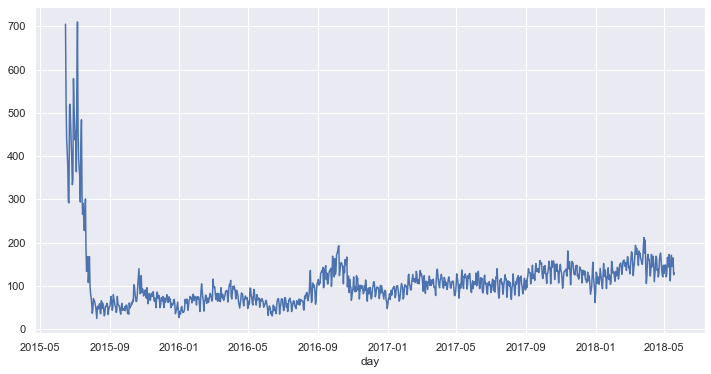

In [340]:
event_data.groupby('day') \
    .user_id.nunique().plot()#.head(10)

## define the probability of users
### как распределены пользователи по баллам, которые они набрали за курс

In [341]:
event_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


<AxesSubplot:>

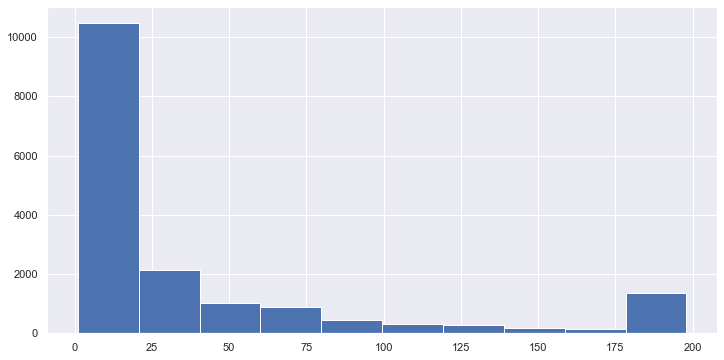

In [342]:
#потеряли наблюдения - люди, которые не решили ничего
event_data[event_data.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id': 'step_passed'}).step_passed.hist()#head(10)

#Пользователи, у которых нет ни одного passed стэпа вообще не попадут в результат

In [343]:
event_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [344]:
#учли наблюдения - люди, которые не решили ничего
users_event_data=event_data.pivot_table(index='user_id', 
                       columns='action', 
                       values='step_id', 
                       aggfunc='count',
                       fill_value=0).reset_index()#.discovered.hist()#head()

'''
index='user_id'  какую колонку будем использовать по индексу
columns='action' какие колонки будут колонками (т.е из множ-ва значений колонки сформ. множество колонок)
values='step_id' то что мы заполним, с какими значениями будем применять аггригац. функцию
aggfunc='count'
fill_value=0     Value to replace missing values with (in the resulting pivot table, after aggregation).
'''

users_event_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


<AxesSubplot:>

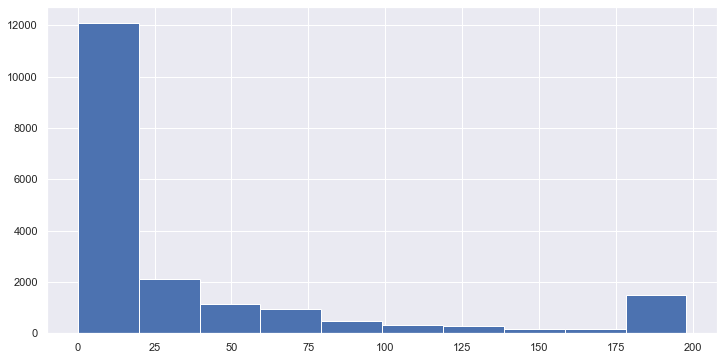

In [345]:
users_event_data['discovered'].hist()

# 1.111==========================================================


In [346]:
submis_data=pd.read_csv(directory_1+'PD_pract\\submissions_data_train.csv')

'''
submis_data=pd.read_csv(directory_1+'PD_pract\\submissions_data_train.zip',compression='zip')
'''

"\nsubmis_data=pd.read_csv(directory_1+'PD_pract\\submissions_data_train.zip',compression='zip')\n"

In [347]:
submis_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [348]:
submis_data['date']=pd.to_datetime(submis_data.timestamp,unit='s')
submis_data['day']=submis_data.date.dt.date

In [349]:
submis_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [350]:
submis_data['submission_status'].unique()

array(['correct', 'wrong'], dtype=object)

In [351]:
#учли наблюдения - люди, которые не решили ничего
users_scores=submis_data.pivot_table(index='user_id', 
                       columns='submission_status', 
                       values='step_id', 
                       aggfunc='count',
                       fill_value=0).reset_index()#.discovered.hist()#head()

#For each user id we get how much user get correct/wrong submissions
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [352]:
event_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


### Оставим только необходимые данные для проверки(анализ перерывов у пользователей курса)

In [353]:
#.drop_duplicates() - убирает дубликаты сочетаний в колонках == b-a|a-a|b-a -> b-a|a-a
#получили значение того дня, когда пользователь был онлайн

event_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [354]:
#соберем все уникальные значения дней, когда каждый пользователь был онлайн / for each user

event_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [355]:
#Нам интересны перерывы между этими днями.Найдем разность между ближайшеми значениями
print(np.diff([1,2,5]))

event_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).head()

[1 3]


user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [356]:
#Соберем все в единое место
gap_data=event_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff)\
    .values#.head()

gap_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int32)], dtype=object)

In [357]:
#Переведем эррей эрреев в 1 эррей

np.concatenate(gap_data, axis=0)#axis=0 - lines

array([4843602, 6899249,  182484, ...,   98252,   57019, 1567990])

In [358]:
#В пандас серии сохранены для каждого/для всех в том числе пользователей значения разницы между двумя заходами на курс
gap_data=pd.Series(np.concatenate(gap_data, axis=0))
gap_data

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int32

In [359]:
#Делим на день 24ч 60 мин 60 сек = разница в днях между заходами на курс

gap_data=gap_data/(24*60*60)
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<AxesSubplot:>

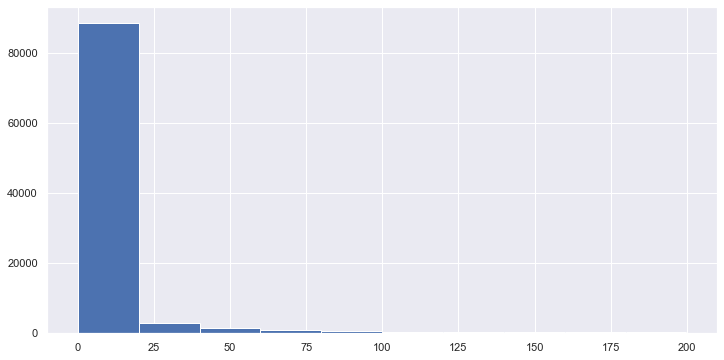

In [360]:
gap_data[gap_data<200].hist()
#большая часть gap_data(времени) между заходами укладывается между 25 дней

In [361]:
gap_data.quantile(0.90)

#только 10% пользователей возвращается на курс после перерыва > чем в см. ниже дней

18.325995370370403

In [362]:
gap_data.quantile(0.95)

#возьмем значение 30 между 90 и 95 куантилем и будем считать - время отсутствия на курсе == дроппнувшийся пользователь

59.760440972222156

## Попытки вычислить организатора курса

In [363]:
event_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [364]:
submis_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [365]:
event_data['action'].unique()
#submis_data['submission_status'].unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [366]:
event_data.pivot_table(index='user_id', 
                       columns='action', 
                       values='step_id', 
                       aggfunc='count',
                       fill_value=0).sort_values(by=['viewed','discovered'],ascending=False).reset_index()

action,user_id,discovered,passed,started_attempt,viewed
0,20907,163,102,0,32778
1,10794,198,122,27,16089
2,25279,198,122,166,9693
3,1046,128,124,721,8122
4,3572,194,193,550,6968
...,...,...,...,...,...
19229,8773,0,0,1,0
19230,11437,0,0,1,0
19231,13181,0,0,7,0
19232,18842,0,1,1,0


In [401]:
gap_data2=event_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list)#.apply(len).sort_values()
    #.head()

#gap_data2    
#event_data['times_in']=gap_data2.apply(len)
#event_data.sort_values(by=['times_in'], ascending=False)

# важно - how='outer' тк при иннере теряем данные в результируещей таблице
attempt2=event_data.merge(gap_data2, on='user_id', how='outer')
attempt2=attempt2.drop_duplicates(subset=['user_id'])
attempt2.head()

,step_id,timestamp_x,action,user_id,date,day,timestamp_y
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,"[1434340848, 1434477295, 1434557155, 143460570..."
909,32815,1434341931,passed,12494,2015-06-15 04:18:51,2015-06-15,"[1434341931, 1434437757, 1434766231, 143488225..."
1359,32815,1434342029,viewed,442,2015-06-15 04:20:29,2015-06-15,"[1434342029, 1434557765, 1434596960, 143473039..."
1953,32815,1434342042,viewed,22254,2015-06-15 04:20:42,2015-06-15,"[1434342042, 1434437731, 1434519965, 143459864..."
2217,32815,1434342230,discovered,6646,2015-06-15 04:23:50,2015-06-15,"[1434342230, 1434658030, 1435433651, 143580102..."


In [405]:
#attempt2['time_intervals']=attempt2.timestamp.apply(len)
attempt2['time_intervals']=attempt2.timestamp_y.apply(len)
attempt2.head(5)

,step_id,timestamp_x,action,user_id,date,day,timestamp_y,time_intervals
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,"[1434340848, 1434477295, 1434557155, 143460570...",20
909,32815,1434341931,passed,12494,2015-06-15 04:18:51,2015-06-15,"[1434341931, 1434437757, 1434766231, 143488225...",21
1359,32815,1434342029,viewed,442,2015-06-15 04:20:29,2015-06-15,"[1434342029, 1434557765, 1434596960, 143473039...",45
1953,32815,1434342042,viewed,22254,2015-06-15 04:20:42,2015-06-15,"[1434342042, 1434437731, 1434519965, 143459864...",13
2217,32815,1434342230,discovered,6646,2015-06-15 04:23:50,2015-06-15,"[1434342230, 1434658030, 1435433651, 143580102...",14


In [403]:
bad=attempt2.columns.isin(['action','day','timestamp_y','step_id','timestamp_x'])
bad

array([ True,  True,  True, False, False,  True,  True, False])

In [404]:
attempt2.iloc[:,~bad].sort_values(by=['time_intervals'], ascending=False).head(5)

,user_id,date,time_intervals
88637,1046,2015-06-15 06:58:39,478
1905902,13268,2016-11-13 20:14:38,385
1258442,4374,2016-03-16 20:13:22,327
1509481,10794,2016-08-02 00:44:34,281
2532139,3572,2017-07-13 09:21:28,236


In [259]:
#gap_data2=pd.DataFrame({'id_user':gap_data2.index, 'time':gap_data2.values})

##gap_data2['mass']=gap_data2['time'].str[1:-1].str.split(',')
#gap_data2['mass'] = gap_data2['time'].str.count() #gap_data2['time'].str.len()
##.apply(str)
#gap_data2.sort_values(by=['mass'], ascending=False).head(10)

## Предположу, что товарищь Анатолий, являющийся основателем курса, посещал его больше остальных и имеет наибольший список посещений, учитывая сей факт обработаем данные и отсортируем их -> id_user=1046

### Variant 1 - person with the biggest number of correct/wrong answer (because system need a tests)

In [406]:
submis_data.pivot_table(index='user_id', 
                       columns='submission_status', 
                       values='step_id', 
                       aggfunc='count',
                       fill_value=0).sort_values(by=['correct','wrong'],ascending=False).head()#.discovered.hist()#head()

submission_status,correct,wrong
user_id,,
1046,421,513
5552,186,93
17135,168,177
6183,142,65
8461,135,42


### Variant 2 - same as Var1 (person who have the most commit account ) 

In [41]:
ans2=submis_data.pivot_table(index='user_id', 
                       columns='submission_status', 
                       values='step_id', 
                       aggfunc='count',
                       fill_value=0)#.discovered.hist()#head()

ans2[ans2['correct'] == ans2['correct'].max()]

submission_status,correct,wrong
user_id,,
1046,421,513


### Variant 3 - first person who have done last step

In [42]:
ans3=event_data[(event_data['action'] == 'passed') & (event_data['step_id'] == event_data['step_id'].max())]\
    .sort_values(by=['date'],ascending=True).head()#.discovered.hist()#head()

ans3[['user_id','date','day']]

,user_id,date,day
1780990,1046,2017-01-24 13:14:24,2017-01-24
1781275,3931,2017-01-24 15:27:49,2017-01-24
1781402,14985,2017-01-24 16:40:14,2017-01-24
1782093,10626,2017-01-24 20:07:21,2017-01-24
1782261,3876,2017-01-24 21:10:42,2017-01-24


### Variant 4 - same as Var1 (person who have the most amount of right scores)

In [43]:
ans4=users_scores[users_scores['correct'] == users_scores['correct'].max()].user_id
ans4

439    1046
Name: user_id, dtype: int64

### Variant 5 - person with the biggest amount of viewed 

In [407]:
event_data.query("action == 'viewed'").groupby('user_id',as_index=False)\
    .agg({'action':'count'})\
    .sort_values(['action'],ascending=False)

,user_id,action
15001,20907,32778
7777,10794,16089
18144,25279,9693
781,1046,8122
2609,3572,6968
...,...,...
5451,7549,1
5452,7551,1
5455,7554,1
5456,7556,1


### Variant 6 - person who have the most amount of time (len) - as mine but simplier

In [409]:
ans5=event_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list).reset_index()

ans5['time']=ans5['timestamp'].apply(len)
ans5[ans5['time'] == ans5['time'].max()][['user_id','time']]

,user_id,time
781,1046,478


### Variant 7

In [410]:
#Find lector in database
#var 7 - variant with big statistic

#event_data.groupby('user_id')['day'].nunique().idxmax()
event_data.groupby('user_id',as_index=False)\
    .aggregate({'day' : ['count','nunique','min','max'],
               'timestamp' : ['count','nunique','min','max'],
                'action' : ['count']}) \
    .sort_values(('action','count'),ascending=False).head(10)

user_id    day                                 timestamp          \
               count nunique         min         max     count nunique   
15007   20907  33043     221  2015-06-15  2016-01-22     33043   32764   
7780    10794  16436     281  2016-08-02  2017-07-27     16436   16089   
18150   25279  10179      75  2017-06-05  2017-08-18     10179    9777   
781      1046   9095     478  2015-06-15  2018-05-01      9095    8834   
2611     3572   7905     236  2017-07-13  2018-05-19      7905    7245   
8470    11770   6641      57  2016-04-05  2016-05-31      6641    6330   
6879     9546   6387     108  2017-12-10  2018-03-27      6387    6017   
553       761   4592      43  2016-02-23  2016-04-05      4592    4281   
6043     8363   3918      48  2017-10-24  2017-12-10      3918    3557   
9792    13602   3480      62  2015-11-22  2017-07-07      3480    3076   

                              action  
              min         max  count  
15007  1434346645  1453480839  33043  
7780   1470098674  1501136015  16436  
18150  1496638821  1503065555  10179  
781    1434351519  1525160857   9095  
2611   1499937688  1526732794   7905  
8470   1459849887  1464693892   6641  
6879   1512892117  1522143783   6387  
553    1456253995  1459848744   4592  
6043   1508812467  1512887644   3918  
9792   1448222271  1499469001   3480

### 1.11  4 vid

In [52]:
event_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [53]:
#соберем все в единое место
gap_data=event_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff)\
    .values#.head()

gap_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int32)], dtype=object)

In [54]:
gap_data=pd.Series(np.concatenate(gap_data, axis=0))
gap_data

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int32

In [55]:
gap_data.quantile(0.90)/(24*60*60)

18.325995370370403

In [61]:
# 30 дней * 24 ч * 60 м * 60 сек == месяцу
30*24*60*60

2592000

In [56]:
event_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [75]:
user_data=event_data.groupby('user_id',as_index=False)\
    .agg({'timestamp':'max'})\
    .rename(columns={'timestamp':'last_timestamp'})

In [76]:
#последний/текущий timestamp (см последнее значение в event_data timestamp)
now=1526772811

#месяц отсутствия
drop_out_threshold=2592000 

In [77]:
#последнее посещение пользователя user_data['last_timestamp']
user_data['is_gone_user']=(now-user_data['last_timestamp']) > drop_out_threshold

In [78]:
# True - пользователь отсутствовал более 30 дней и к курсу больше не вернется
user_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [79]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [80]:
# важно - how='outer' тк при иннере теряем данные в результируещей таблице
user_data=user_data.merge(users_scores, on='user_id', how='outer')
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN


In [81]:
user_data=user_data.fillna(0)
user_data.head(20)

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
5,8,1481466913,True,9.0,21.0
6,9,1484999497,True,0.0,0.0
7,11,1526140625,False,0.0,0.0
8,14,1436368676,True,0.0,1.0
9,16,1513162585,True,77.0,106.0


In [82]:
#агрегированная статистика
user_data=user_data.merge(users_event_data, on='user_id', how='outer')
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [84]:
#число уникальных дней которые пользователь был 
user_days = event_data.groupby('user_id').day.nunique().to_frame().reset_index()
user_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [85]:
user_data=user_data.merge(user_days, on='user_id', how='outer')
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [89]:
#Проверяем кол-во юзеров
print(user_data.user_id.nunique(),event_data.user_id.nunique())
#Ничего не потеряли Ура!

19234 19234


In [90]:
user_data['pass_course'] = user_data.passed>170

In [91]:
user_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,pass_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


Index([False, True], dtype='object', name='pass_course')


<AxesSubplot:xlabel='pass_course', ylabel='day'>

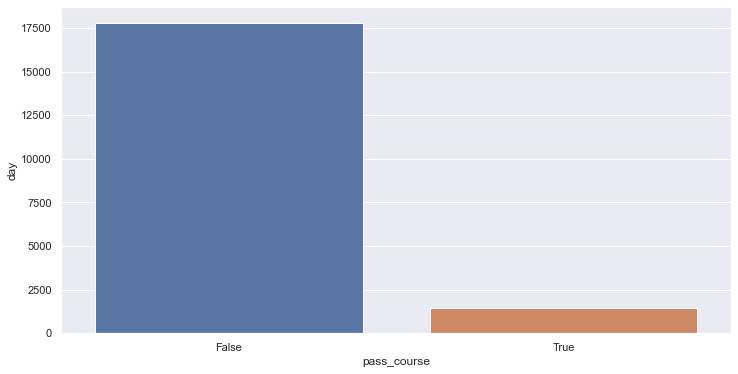

In [119]:
user_data.groupby('pass_course').count().day

ans_x=user_data.groupby('pass_course').count().day
print(ans_x.index)
sns.barplot(x=ans_x.index, y =ans_x)

# 2.9   ==========================================================


In [76]:
#min time which user have spend between
#timestamp - time wthen user start smth so when we take min timestamp we take first time user start course 
user_min_time = event_data.groupby('user_id',as_index = False)\
                          .agg({'timestamp': 'min'})\
                          .rename({'timestamp': 'min_timestamp'}, axis=1)

user_min_time.head()

user_data = user_data.merge(user_min_time, how ='outer')

In [71]:
print(user_data[user_data.pass_course].day.median())
#user_data[user_data.pass_course].day.hist()

event_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [85]:
event_data_train = pd.DataFrame()
'''#take a lot of time
for user_id in user_data.user_id:
    min_user_time = user_data[user_data.user_id == user_id].min_timestamp.item()
    time_threshold = min_user_time + 3*24*60*60
    
    user_event_data = event_data[(event_data.user_id == user_id) & (event_data.timestamp < time_threshold)]
    
    event_data_train = event_data_train.append(user_event_data)
    break
'''    

'''#better variant by step_student
event_data_train = event_data[event_data['timestamp'] <= event_data.merge(user_data[['user_id','min_timestamp']],how='left')
                             .min_timestamp + 3*24*60*60]
'''

#print(user_id,min_user_time)
#event_data_train

1 1472827464


,step_id,timestamp,action,user_id,date,day
1347416,31981,1472827464,viewed,1,2016-09-02 14:44:24,2016-09-02
1347417,31981,1472827464,discovered,1,2016-09-02 14:44:24,2016-09-02


In [ ]:
event_data_train = event_data[event_data.user_id event_data['timestamp']

In [87]:
#by teacher

event_data['user_time'] = event_data['user_id'].map(str) + '_' + event_data['timestamp'].map(str)

In [88]:
event_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [89]:
learning_time_threshold = 3*24*60*60
learning_time_threshold

259200

In [92]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp +learning_time_threshold).map(str)
user_learning_time_threshold.head() #for every user we get time after that we won`t use date

0    1_1473086664
1    2_1514642564
2    3_1434617676
3    5_1466416009
4    7_1521893860
dtype: object

In [94]:
user_min_time['user_learning_time_threshold']=user_learning_time_threshold

In [97]:
event_data = event_data.merge(user_min_time[['user_id','user_learning_time_threshold']], how = 'outer')
print(event_data.shape)
event_data.head()

#с помощью текущей таблицы определеи вписывается ли время выполнению Экшена в заданный нами диапазон 2 послед столбца

(3480703, 8)


,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [98]:
event_data_train = event_data[event_data.user_time <= event_data.user_learning_time_threshold]

In [99]:
event_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [ ]:
#submissions_data_train.csv
'''
submissions_train.csv - данные о времени и статусах сабмитов к практическим заданиям

step_id - id стэпа
timestamp - время отправки решения в формате unix date
submission_status - статус решения
user_id - анонимизированный id юзера
'''

In [ ]:
'''user_left_data[event_data.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id': 'step_passed'}).head()#head(10)

#5
user_left_data.query("action == 'viewed'").groupby('user_id',as_index=False)\
    .agg({'action':'count'})\
    .sort_values(['action'],ascending=False)'''

In [117]:
submis_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [118]:
group_steps=submis_data[submis_data.submission_status == 'wrong'] \
                .groupby('step_id', as_index=False) \
                .agg({'user_id': 'count'}) 

group_steps.head()

,step_id,user_id
0,31971,6893
1,31972,8960
2,31976,5937
3,31977,6457
4,31978,16084


In [124]:
#master Anatoli

submissions_data = pd.read_csv(directory_1+'PD_pract\\submissions_data_train.csv')

submissions_data_by_step = submissions_data \
    .pivot_table(index=['user_id', 'step_id'], columns='submission_status',
                 values='timestamp', aggfunc = 'max', fill_value=0) \
    .reset_index()

#submissions_data_by_step.head()
'''
submissions_data_by_step['is_solved'] = submissions_data_by_step.correct > 0

users_max_time = submissions_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}) \
    .rename(columns={'timestamp': 'last_timestamp'})


not_solved_steps = submissions_data_by_step[submissions_data_by_step.is_solved == False]

not_solved_steps = not_solved_steps.merge(users_max_time, on='user_id')

not_solved_steps['is_last_action'] = not_solved_steps.wrong == not_solved_steps.last_timestamp

not_solved_steps_last_action = not_solved_steps[not_solved_steps.is_last_action == True]

not_solved_steps_last_action.groupby('step_id', as_index=False) \
    .agg({'user_id': 'count'}).sort_values('user_id', ascending=False).head()
'''

submission_status,user_id,step_id,correct,wrong
0,2,32812,1514383485,0
1,2,32929,1514383420,0
2,3,31971,1441259266,0
3,3,31972,1441258743,0
4,3,31976,1441258564,0
